<a href="https://colab.research.google.com/github/JulioBrasil1/mlp_iris/blob/main/mlp_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

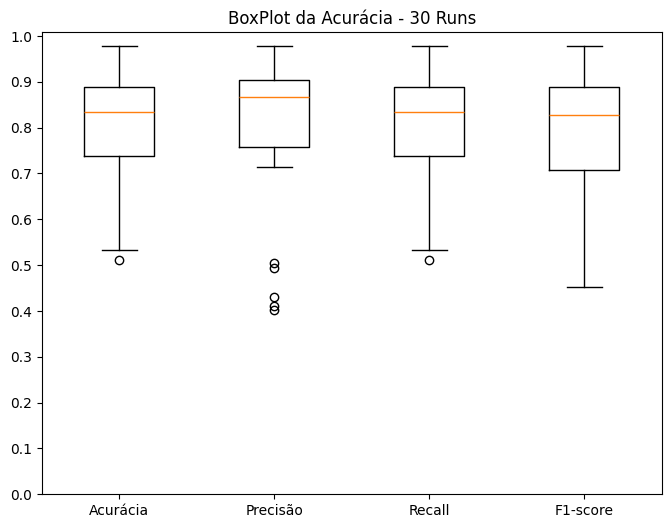

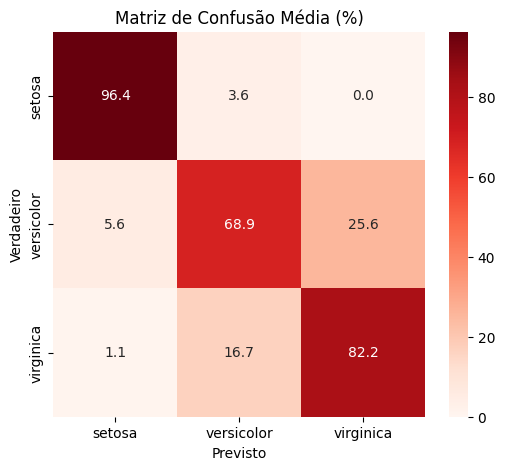

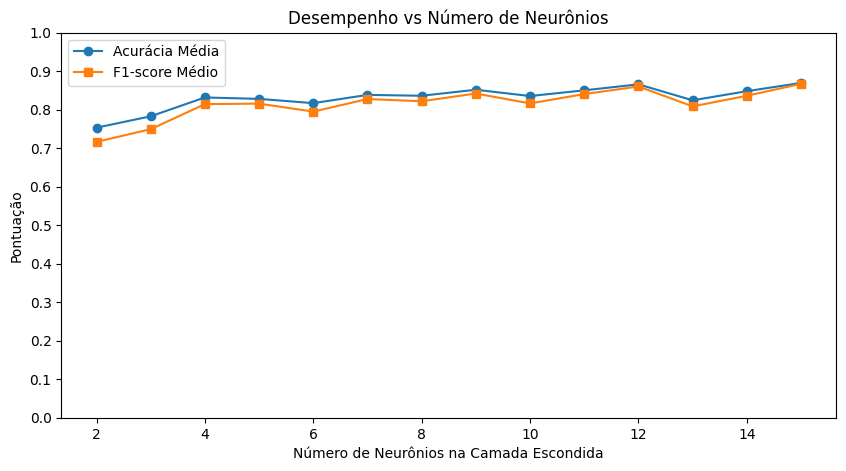


Função de Ativação: identity


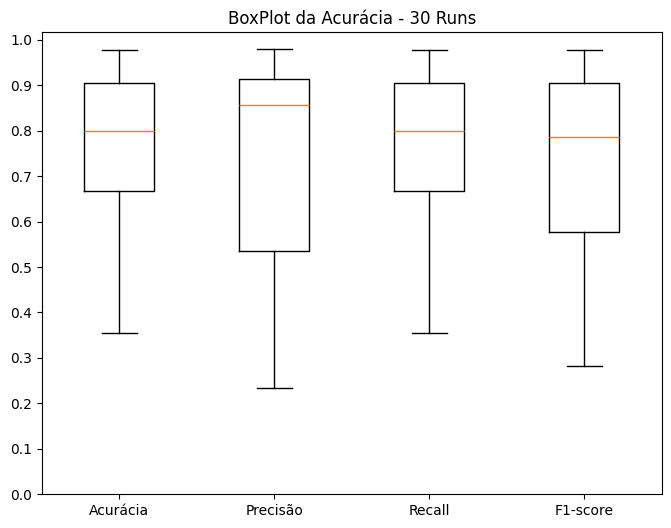


Função de Ativação: logistic


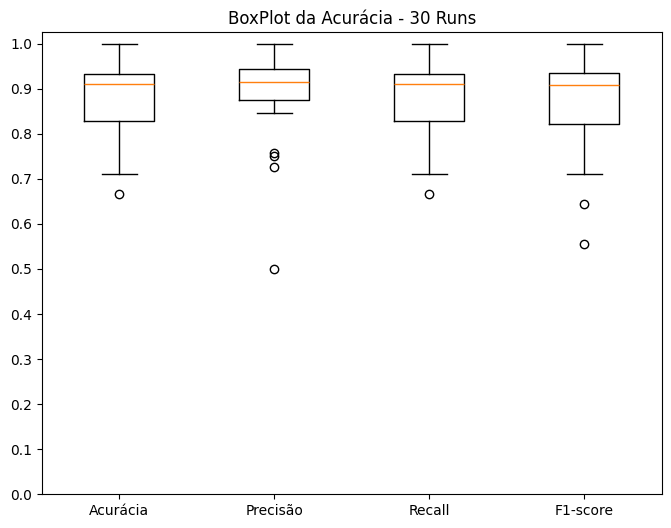


Função de Ativação: tanh


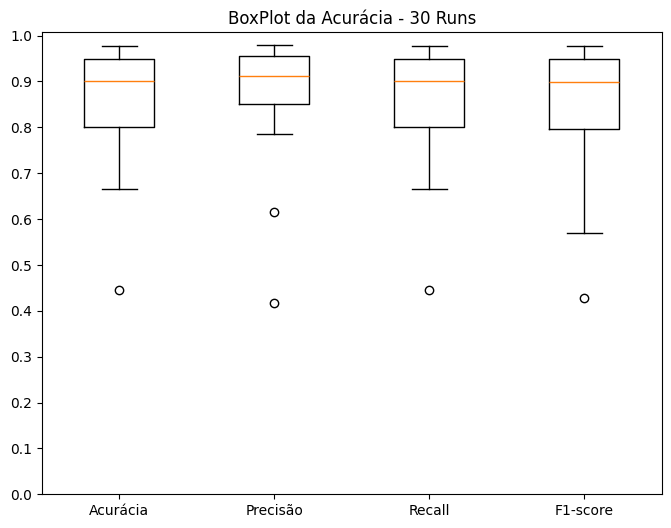


Função de Ativação: relu


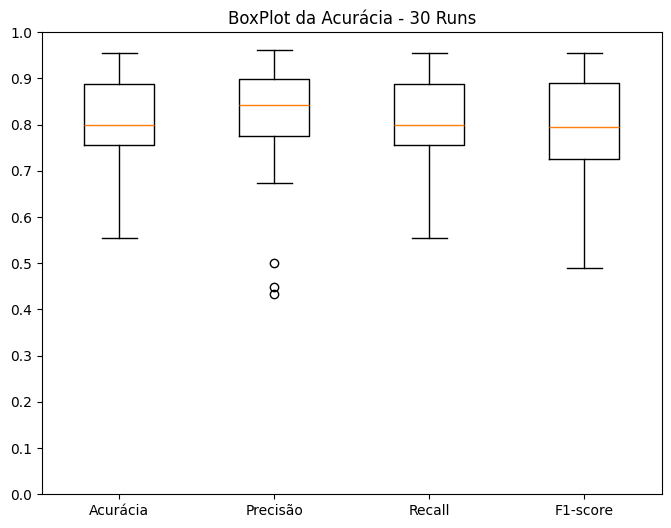

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler

iris = load_iris()
x = iris.data
y = iris.target

def avaliar_mlp(n_neuronios=3, ativacao='logistic', test_size=0.3):
    accs = []
    precs = []
    recs = []
    f1s = []
    confs = []

    for _ in range(30):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, stratify=y)

        scaler = StandardScaler()
        x_train_scaled = scaler.fit_transform(x_train)
        x_test_scaled = scaler.transform(x_test)

        mlp = MLPClassifier(hidden_layer_sizes=(n_neuronios,), activation=ativacao, max_iter=10000, learning_rate_init=0.1, early_stopping=True, alpha=0.0001, random_state=None)
        mlp.fit(x_train_scaled, y_train)

        y_pred = mlp.predict(x_test_scaled)

        accs.append(accuracy_score(y_test, y_pred))
        precs.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
        recs.append(recall_score(y_test, y_pred, average='macro', zero_division=0))
        f1s.append(f1_score(y_test, y_pred, average='macro', zero_division=0))
        confs.append(confusion_matrix(y_test, y_pred, labels=[0,1,2]))

    return {'accuracy': accs,'precision': precs,'recall': recs,'f1': f1s,'confusions': confs}

resultados = avaliar_mlp(n_neuronios=3, ativacao='relu')


#Boxplot a partir daqui
def plot_boxplots(resultados, titulo='Desempenho do MLP'):
    resultados = avaliar_mlp(ativacao='relu')

    plt.figure(figsize=(8, 6))
    dados = [resultados['accuracy'], resultados['precision'], resultados['recall'], resultados['f1']]
    nomes = ['Acurácia', 'Precisão', 'Recall', 'F1-score']
    plt.boxplot(dados, tick_labels=nomes)
    plt.title('BoxPlot da Acurácia - 30 Runs')
    plt.yticks(np.arange(0, 1.05, 0.1))
    plt.show()

plot_boxplots(resultados)



#Matriz de Confusão a partir daqui
confs = resultados['confusions']

media = np.mean(confs, axis=0)
porcentagem = 100 * media / media.sum(axis=1, keepdims=True)
plt.figure(figsize=(6, 5))
sns.heatmap(porcentagem, annot=True, fmt=".1f", cmap='Reds', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão Média (%)")
plt.show()


#Aqui já são os testes de desempenho com 2 - 15 neurônios, vendo sua acurácia e f1-score médios
metricas = {'neurons': [], 'accuracy': [], 'f1': []}

for n in range(2, 16):
    r = avaliar_mlp(n_neuronios=n)
    metricas['neurons'].append(n)
    metricas['accuracy'].append(np.mean(r['accuracy']))
    metricas['f1'].append(np.mean(r['f1']))


plt.figure(figsize=(10,5))
plt.plot(metricas['neurons'], metricas['accuracy'], marker='o', label='Acurácia Média')
plt.plot(metricas['neurons'], metricas['f1'], marker='s', label='F1-score Médio')
plt.xlabel('Número de Neurônios na Camada Escondida')
plt.ylabel('Pontuação')
plt.title('Desempenho vs Número de Neurônios')
plt.legend()
plt.yticks(np.arange(0, 1.05, 0.1))
plt.show()


#E aqui são as diferentes funções de ativação
ativacoes = ['identity', 'logistic', 'tanh', 'relu']
for ativ in ativacoes:
    print(f"\nFunção de Ativação: {ativ}")
    res = avaliar_mlp(n_neuronios=3, ativacao=ativ)
    plot_boxplots(res, titulo=f"Desempenho com ativação: {ativ}")
